In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Database Design
OLAP Data Warehouse for Ecommerce

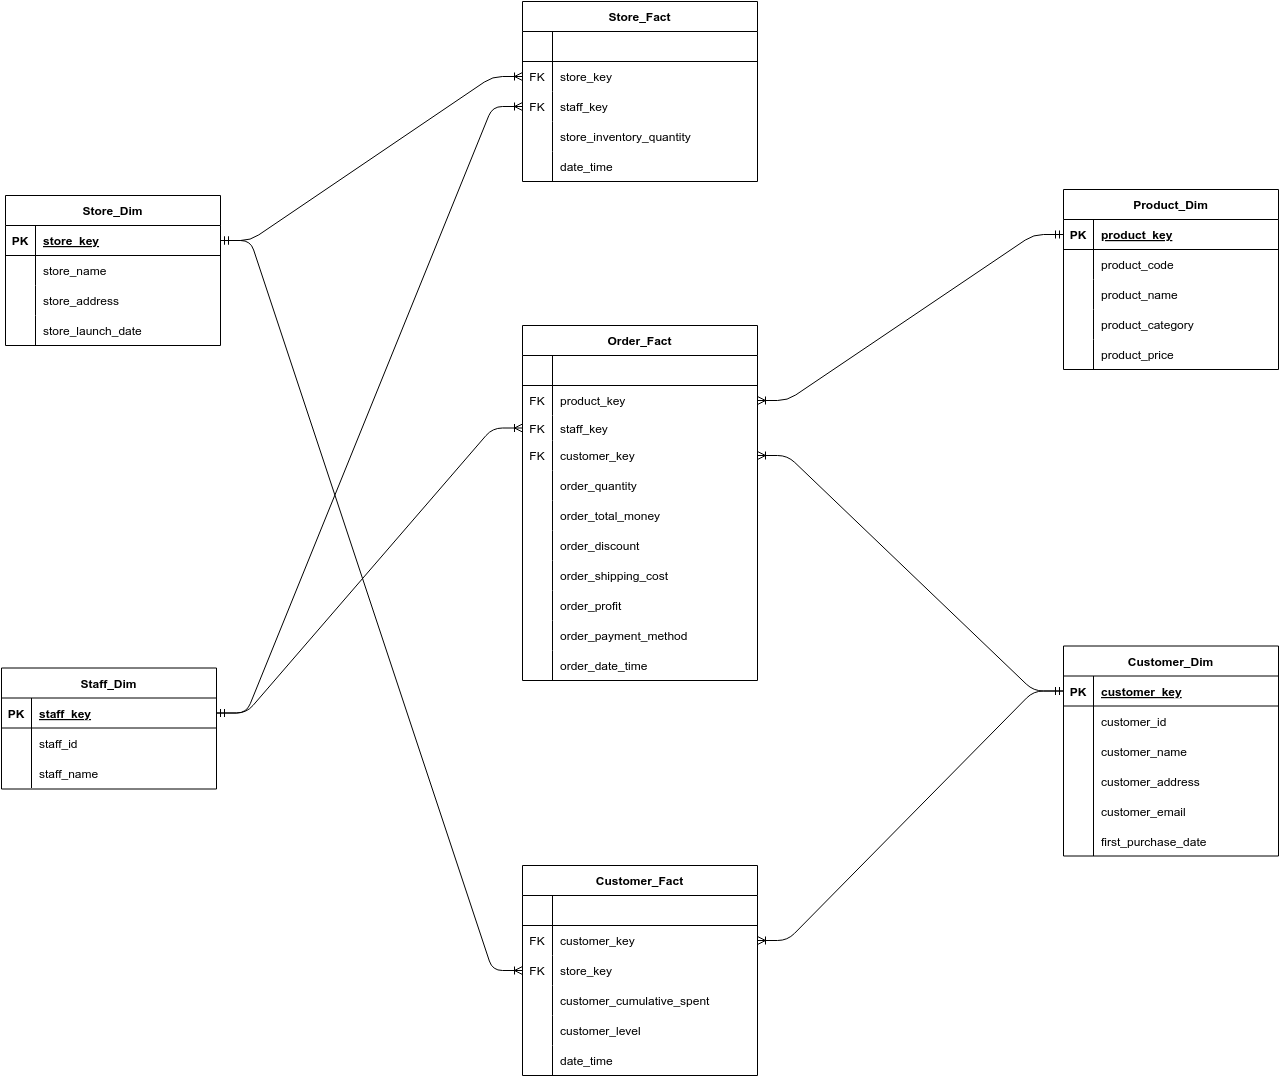

In [ ]:
# Schema
from IPython.display import display, Image
display(Image(filename='/content/gdrive/MyDrive/database_project/schema.png',  width = 800, height = 600))

# DB Creation: From 3 database from Kaggle: Ecommerce, CommonNames, Locations to create the mock data from the schema

- Output 7 tables: order_fact.csv, store_fact.csv, customer_fact.csv, store_dim.csv, product_dim.csv, customer_dim.csv, staff_dim.csv


## Order_fact

In [ ]:
order_fact = pd.read_csv("/content/gdrive/MyDrive/database_project/dataset2.csv",
                 on_bad_lines='skip')#, encoding= 'unicode_escape')

In [ ]:
product_dim = pd.read_csv("/content/gdrive/MyDrive/database_project/product_dim.csv")


In [ ]:
product_dim=product_dim.dropna().reset_index(drop=True)
product_dim[['product_code', 'product_name', 'product_category',
       'product_price']].reset_index().rename(columns={"index":"product_key"}).to_csv("/content/gdrive/MyDrive/database_project/product_dim.csv")

In [ ]:
order_fact=order_fact[['Order_Date', 'Time',  'Customer_Id', 'Gender', 'Product',
       'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Payment_method']]

In [ ]:
order_fact=order_fact.merge(product_dim, left_on="Product", right_on="product_name", how="left")[['Order_Date', 'Time',  'Customer_Id', 'Gender',
       'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Payment_method', "product_key", "product_price"]]

In [ ]:
order_fact=order_fact.merge(customer_dim, left_on="Customer_Id", right_on="customer_id", how="left")[['Order_Date', 'Time',
       'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Payment_method', "product_key", "product_price", "customer_key"]]

In [ ]:
order_fact["staff_key"] = staff_list

In [ ]:
order_fact["order_total_money"] = order_fact["Quantity"] * order_fact["product_price"] * (1-order_fact["Discount"]) + order_fact["Shipping_Cost"]

In [ ]:
order_fact["order_date_time"] = order_fact["Order_Date"] + " " + order_fact["Time"]

In [ ]:
order_fact.columns

Index(['Order_Date', 'Time', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost',
       'Payment_method', 'product_key', 'product_price', 'customer_key',
       'staff_key', 'order_total_money', 'order_date_time'],
      dtype='object')

In [ ]:
order_fact1=order_fact[['product_key','staff_key', 'customer_key','Quantity','order_total_money', 'Discount', 'Shipping_Cost','Profit', 
       'Payment_method', 'order_date_time']]

In [ ]:
order_fact1.columns=['product_key','staff_key', 'customer_key','order_quantity','order_total_money', 'order_discount',
                     'order_shipping_cost','order_profit', 'order_payment_method', 'order_date_time']

In [ ]:
order_fact1.to_csv("/content/gdrive/MyDrive/database_project/order_fact.csv", index=False)

In [ ]:
product_dim.drop(columns=['Unnamed: 0']).to_csv("/content/gdrive/MyDrive/database_project/product_dim.csv", index=False)

In [ ]:
import pandas as pd
order_fact = pd.read_csv("/content/gdrive/MyDrive/database_project/order_fact.csv")

In [ ]:
#

## Store Fact

In [ ]:
store_dim = pd.read_csv("/content/gdrive/MyDrive/database_project/store_dim.csv")

In [ ]:
import datetime
from dateutil import relativedelta
nextmonth = datetime.date.today() + relativedelta.relativedelta(months=1)

In [ ]:
store_dim["store_launch_date"]

,store_key,store_name,store_address,store_launch_date
0,0,RAPID CITY,"RAPID CITY, SD, USA",06/20/2016
1,1,WASHINGTON,"WASHINGTON, GA, USA",03/16/2017
2,2,ARTESIA,"ARTESIA, NM, USA",12/21/2015
3,3,NOCONA,"NOCONA, TX, USA",03/16/2016
4,4,ROME,"ROME, NY, USA",06/03/2017
...,...,...,...,...
293,293,COALGATE,"COALGATE, OK, USA",08/14/2015
294,294,KIOWA,"KIOWA, KS, USA",10/08/2015
295,295,DAPHNE,"DAPHNE, AL, USA",07/20/2017
296,296,HUGOTON,"HUGOTON, KS, USA",12/03/2016


In [ ]:
store_dim["string_date"] = pd.to_datetime(store_dim.store_launch_date).dt.strftime("%Y-%m-%d")

In [ ]:
# For each first month from the launch date
def date_list(row):
  return pd.date_range(row,'2018-12-31', freq='MS').strftime("%Y-%m-%d").tolist()
store_dim["date_list"] = store_dim["string_date"].apply(date_list)

In [ ]:
store_dim.explode("date_list")

,store_key,store_name,store_address,store_launch_date,string_date,date_list
0,0,RAPID CITY,"RAPID CITY, SD, USA",06/20/2016,2016-06-20,2016-07-01
0,0,RAPID CITY,"RAPID CITY, SD, USA",06/20/2016,2016-06-20,2016-08-01
0,0,RAPID CITY,"RAPID CITY, SD, USA",06/20/2016,2016-06-20,2016-09-01
0,0,RAPID CITY,"RAPID CITY, SD, USA",06/20/2016,2016-06-20,2016-10-01
0,0,RAPID CITY,"RAPID CITY, SD, USA",06/20/2016,2016-06-20,2016-11-01
...,...,...,...,...,...,...
297,297,DELHI,"DELHI, NY, USA",07/13/2017,2017-07-13,2018-08-01
297,297,DELHI,"DELHI, NY, USA",07/13/2017,2017-07-13,2018-09-01
297,297,DELHI,"DELHI, NY, USA",07/13/2017,2017-07-13,2018-10-01
297,297,DELHI,"DELHI, NY, USA",07/13/2017,2017-07-13,2018-11-01


In [ ]:
staff_dim = pd.read_csv("/content/gdrive/MyDrive/database_project/staff_dim.csv")

In [ ]:
# for each store we have 3 accountants to update the note

store_dim1 = pd.read_csv("/content/gdrive/MyDrive/database_project/store_dim.csv")

In [ ]:
store_dim1["accountant"]=staff_dim["staff_key"].sample(298*3).values.reshape(298,3).tolist()

,store_key,store_name,store_address,store_launch_date
0,0,RAPID CITY,"RAPID CITY, SD, USA",06/20/2016
1,1,WASHINGTON,"WASHINGTON, GA, USA",03/16/2017
2,2,ARTESIA,"ARTESIA, NM, USA",12/21/2015
3,3,NOCONA,"NOCONA, TX, USA",03/16/2016
4,4,ROME,"ROME, NY, USA",06/03/2017
...,...,...,...,...
293,293,COALGATE,"COALGATE, OK, USA",08/14/2015
294,294,KIOWA,"KIOWA, KS, USA",10/08/2015
295,295,DAPHNE,"DAPHNE, AL, USA",07/20/2017
296,296,HUGOTON,"HUGOTON, KS, USA",12/03/2016


In [ ]:
store_fact=store_dim.explode("date_list")[["store_key","date_list"]].merge(store_dim1[["store_key", "accountant"]], on="store_key", how="left")
def random_accountant(row):
  return row[random.randrange(len(row))]
store_fact["staff_key"] = store_fact["accountant"].apply(random_accountant)

In [ ]:
import random

store_fact["store_inventory_quantity"] = [random.randint(5,20)*100 for i in range(len(store_fact))]

In [ ]:
store_fact["date_sort"]=pd.to_datetime(store_fact.date_list)
store_fact_final=store_fact.sort_values(by=["date_sort"]).rename(columns={"date_list":"date_time"})[["store_key", "staff_key", "store_inventory_quantity", "date_time"]]

In [ ]:
store_fact_final.to_csv("/content/gdrive/MyDrive/database_project/store_fact.csv", index=False)

In [ ]:
order_fact["order_date_time"]=pd.to_datetime(order_fact["order_date_time"])
cus_datetime = order_fact.sort_values(by=["order_date_time"])[["customer_key","order_date_time"]].drop_duplicates(ignore_index=True, subset="customer_key", keep="last")

In [ ]:
cus_datetime

,customer_key,order_date_time
0,23,2018-01-01 00:06:09
1,16,2018-01-01 00:15:12
2,33,2018-01-01 01:35:02
3,68,2018-01-01 08:20:11
4,58,2018-01-01 10:11:40
...,...,...
38992,38940,2018-12-30 23:32:46
38993,38909,2018-12-30 23:33:31
38994,38928,2018-12-30 23:39:52
38995,38952,2018-12-30 23:51:06


## Customer Fact

In [ ]:
import random
lst = store_dim["store_key"].values
store_list=[lst[random.randrange(len(lst))] for i in range(51290)]
order_fact["store_key"] = store_list

In [ ]:
lst = ["New", "Silver", "Gold", "Platinum", "Diamond", "VIP"]
level_list=[lst[random.randrange(len(lst))] for i in range(len(customer_fact))]

In [ ]:
customer_fact = pd.DataFrame(order_fact.groupby(by=["customer_key","store_key"])["order_total_money"].sum())
#customer_fact["customer_level"] = level_list

In [ ]:
a=[(random.random()+.5)*2 for i in range(len(customer_fact))]

In [ ]:
customer_fact['a']=a

In [ ]:
customer_fact

order_total_money         a
customer_key store_key                             
0            109                    377.8  2.764991
1            277                     84.0  1.599600
2            24                     162.5  1.769861
             98                     114.7  1.623969
3            250                    703.9  2.474371
...                                   ...       ...
38992        148                     67.0  2.891214
38993        7                      108.6  1.514138
38994        209                     82.7  1.764487
38995        80                      60.4  2.952836
38996        224                    197.4  1.067427

[51233 rows x 2 columns]

In [ ]:
customer_fact['customer_cumulative_spent'] = customer_fact["a"] * customer_fact["order_total_money"]

In [ ]:
customer_fact.reset_index(inplace=True)#.rename(columns={"order_total_money": "customer_cumulative_spent"})

In [ ]:
customer_fact = customer_fact[['customer_key','store_key','customer_cumulative_spent']].round(1)

In [ ]:
level_df=pd.DataFrame(customer_fact.groupby(by=["customer_key"])["customer_cumulative_spent"].sum()).reset_index()
level_df

,customer_key,customer_cumulative_spent
0,0,1044.6
1,1,134.4
2,2,473.9
3,3,1741.7
4,4,1082.1
...,...,...
38992,38992,193.7
38993,38993,164.4
38994,38994,145.9
38995,38995,178.4


In [ ]:
level_df["customer_cumulative_spent"].describe()

count    38997.000000
mean       714.744196
std        641.422488
min          0.000000
25%        248.700000
50%        504.200000
75%        982.700000
max       5964.700000
Name: customer_cumulative_spent, dtype: float64

In [ ]:
def level(row):
  if 100<=row<250: return 'Gold' 
  elif 250<=row<500: return 'Platinum' 
  elif 500<=row<1000: return 'Diamond'
  elif 1000<=row: return 'VIP' 
  else: return 'Member'
level_df["customer_level"] = level_df["customer_cumulative_spent"].apply(level)

In [ ]:
level_df["customer_level"].describe()

count       38997
unique          5
top       Diamond
freq        10131
Name: customer_level, dtype: object

In [ ]:
customer_fact1=customer_fact.merge(level_df[["customer_key","customer_level"]], on="customer_key", how="left")

In [ ]:
customer_fact1.merge(cus_datetime, on="customer_key", how="left").rename(columns={"order_date_time":"date_time"}).sort_values(by=["date_time"]).to_csv("/content/gdrive/MyDrive/database_project/customer_fact.csv", index=False)

In [ ]:
staff_dim=pd.read_csv("/content/gdrive/MyDrive/database_project/staff_dim.csv")

In [ ]:
lst = staff_dim["staff_key"].values
staff_list=[lst[random.randrange(len(lst))] for i in range(51290)]

In [ ]:
df=df.sort_values(by=["Date"])

In [ ]:
df["Customer_Id"].nunique()

38997

In [ ]:
df.to_pickle("/content/gdrive/MyDrive/database_project/current_order.pkl")

In [ ]:
import pandas as pd

df=pd.read_pickle("/content/gdrive/MyDrive/database_project/current_order.pkl")

## customer/staff

In [ ]:
customer_dim = df[["Customer_Id", "Date"]].drop_duplicates(ignore_index=True, subset="Customer_Id", keep="first")
#drop_duplicates(subset='A', keep="last")

In [ ]:
customer_dim["customer_name"] = customer_name["name"].values
customer_dim["customer_email"] = customer_name["email"].values

In [ ]:
customer_dim.columns=['customer_id', 'first_purchase_date', 'customer_address', 'customer_name', 'customer_email']

In [ ]:
customer_dim=customer_dim[['customer_id', 'customer_name','customer_address', 'customer_email', 'first_purchase_date']].reset_index().rename(columns={"index":"customer_key"})

In [ ]:
customer_dim.to_csv("/content/gdrive/MyDrive/database_project/customer_dim.csv", index=False)

In [ ]:
staff=staff_name_available.reset_index().rename(columns={"index":"staff_id"}).sample(frac=1)
staff=staff.reset_index().drop(columns=['index']).reset_index().rename(columns={"index":"staff_key", "name":"staff_name"})

In [ ]:
staff[["staff_key", "staff_id", "staff_name"]].to_csv("/content/gdrive/MyDrive/database_project/staff_dim.csv", index=False)

In [ ]:
staff=staff.reset_index().rename(columns={"index":"staff_key"})

In [ ]:
staff

,staff_key,staff_id,staff_name,email
0,0,41416,Marion Greig,mariongreig@gmail.com
1,1,41319,Caitríona Ní Riain,caitríonaníriain@gmail.com
2,2,40152,Romulus Augustus,romulusaugustus@gmail.com
3,3,44721,Yevhen Konovalets,yevhenkonovalets@gmail.com
4,4,46029,Jana Knedlíková,janaknedlíková@gmail.com
...,...,...,...,...
8759,8759,45585,Hans-Jürgen Baake,hans-jürgenbaake@gmail.com
8760,8760,39641,Ira Coleman,iracoleman@gmail.com
8761,8761,46566,Đorđe Topalović,đorđetopalović@gmail.com
8762,8762,45852,Mary Susan Makobatjatji Malahlela-Xakana,marysusanmakobatjatjimalahlela-xakana@gmail.com


## locations

In [ ]:
locations = pd.read_csv("/content/gdrive/MyDrive/database_project/us_hospital_locations.csv")

In [ ]:
locations.columns

Index(['X', 'Y', 'FID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'STATE_ID', 'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF',
       'BEDS', 'TRAUMA', 'HELIPAD'],
      dtype='object')

In [ ]:
locations=locations[["CITY", "STATE", "COUNTRY"]].drop_duplicates(ignore_index=True)
locations["address"] = locations["CITY"] + ", " + locations["STATE"] + ", " + locations["COUNTRY"]

In [ ]:
len(locations)

4295

In [ ]:
locations.sample()

In [ ]:
import random
lst = locations["address"].values
address_list=[lst[random.randrange(len(lst))] for i in range(38997)]

In [ ]:
customer_dim["address"]=address_list

In [ ]:
import random
import time
    
def str_time_prop(start, end, time_format, prop):
    """Get a time at a proportion of a range of two formatted times.

    start and end should be strings specifying times formatted in the
    given format (strftime-style), giving an interval [start, end].
    prop specifies how a proportion of the interval to be taken after
    start.  The returned time will be in the specified format.
    """

    stime = time.mktime(time.strptime(start, time_format))
    etime = time.mktime(time.strptime(end, time_format))

    ptime = stime + prop * (etime - stime)

    return time.strftime(time_format, time.localtime(ptime))


def random_date(start, end, prop):
    return str_time_prop(start, end, '%m/%d/%Y', prop)
    
random_dates = [random_date("1/1/2014", "1/1/2018", random.random()) for i in range(298)]

In [ ]:
len(random_dates)

298

In [ ]:
# how many store? 298
store_dim=locations.sample(298, ignore_index=True)[["CITY","address"]]
store_dim.columns=["store_name", "store_address"]
store_dim["store_launch_date"] = random_dates

In [ ]:
store_dim.reset_index().rename(columns={"index":"store_key"}).to_csv("/content/gdrive/MyDrive/database_project/store_dim.csv", index=False)

## product_dim

In [ ]:
product_table = df[["Product", "Product_Category", "Sales"]].drop_duplicates(ignore_index=True)

In [ ]:
product_table["product_code"] = a[['StockCode']].drop_duplicates().sample(43)["StockCode"].values

In [ ]:
product_table.columns = ["product_name", "product_category", "product_price", "product_code"]

In [ ]:
product_table = product_table[["product_code","product_name","product_category","product_price"]].reset_index().rename(columns={"index":"product_key"})

In [ ]:
product_table.to_csv("/content/gdrive/MyDrive/database_project/product_dim.csv", index=False)

# CSV to SQLite .db, query using SQL

From all the created .csv files, import those to a database file for querying 

# Create my_data.db

In [ ]:
import pandas as pd

store_fact = pd.read_csv("/content/gdrive/MyDrive/database_project/store_fact.csv")
order_fact = pd.read_csv("/content/gdrive/MyDrive/database_project/order_fact.csv")
customer_fact = pd.read_csv("/content/gdrive/MyDrive/database_project/customer_fact.csv")
product_dim = pd.read_csv("/content/gdrive/MyDrive/database_project/product_dim.csv")
store_dim = pd.read_csv("/content/gdrive/MyDrive/database_project/store_dim.csv")
customer_dim = pd.read_csv("/content/gdrive/MyDrive/database_project/customer_dim.csv")
staff_dim = pd.read_csv("/content/gdrive/MyDrive/database_project/staff_dim.csv")

In [ ]:

print("store_fact ", len(store_fact))
print("order_fact ",len(order_fact))
print("customer_fact ",len(customer_fact))
print("product_dim",len(product_dim))
print("store_dim",len(store_dim))
print("customer_dim",len(customer_dim))
print("staff_dim",len(staff_dim))

store_fact  10543
order_fact  51290
customer_fact  51233
product_dim 42
store_dim 298
customer_dim 38997
staff_dim 8764


In [ ]:
store_fact = pd.read_csv("/content/gdrive/MyDrive/database_project/store_fact.csv")

In [ ]:
order_fact

,product_key,staff_key,customer_key,order_quantity,order_total_money,order_discount,order_shipping_cost,order_profit,order_payment_method,order_date_time
0,0,83,108,1.0,102.6,0.3,4.6,46.0,credit_card,2018-01-02 10:56:33
1,1,8265,21853,1.0,158.9,0.3,11.2,112.0,credit_card,2018-07-24 20:41:37
2,2,1120,33714,5.0,529.6,0.1,3.1,31.2,credit_card,2018-11-08 08:38:49
3,3,8358,8606,1.0,85.2,0.3,2.6,26.2,credit_card,2018-04-18 19:28:06
4,4,6128,24314,1.0,191.0,0.3,16.0,160.0,credit_card,2018-08-13 21:18:39
...,...,...,...,...,...,...,...,...,...,...
51285,39,7728,4479,4.0,349.1,0.3,1.9,19.2,money_order,2018-02-28 22:59:50
51286,40,3933,4467,5.0,281.4,0.2,1.4,14.0,credit_card,2018-02-28 13:19:25
51287,41,4022,4489,1.0,97.1,0.3,4.0,39.7,credit_card,2018-02-28 10:25:07
51288,32,6522,4475,1.0,186.0,0.2,13.2,131.7,credit_card,2018-02-28 10:50:08


In [ ]:
from pathlib import Path
Path('/content/gdrive/MyDrive/database_project/my_data.db').touch()

In [ ]:
import sqlite3
conn = sqlite3.connect('/content/gdrive/MyDrive/database_project/my_data.db')

In [ ]:
import sqlite3

table_names = ["store_fact", "order_fact", "customer_fact", "product_dim", "store_dim", "customer_dim", "staff_dim"]

file_names = ["/content/gdrive/MyDrive/database_project/store_fact.csv",
              "/content/gdrive/MyDrive/database_project/order_fact.csv",
              "/content/gdrive/MyDrive/database_project/customer_fact.csv",
              "/content/gdrive/MyDrive/database_project/product_dim.csv",
              "/content/gdrive/MyDrive/database_project/store_dim.csv",
              "/content/gdrive/MyDrive/database_project/customer_dim.csv",
              "/content/gdrive/MyDrive/database_project/staff_dim.csv"]

conn = sqlite3.connect('/content/gdrive/MyDrive/database_project/my_data.db')
for file_name, table_name in zip(file_names, table_names):
    df = pd.read_csv(file_name)
    df.to_sql(table_name, conn, if_exists='append', index=False)
conn.close()

# Query the database with sqlite3

In [ ]:
import sqlite3
con = sqlite3.Connection('/content/gdrive/MyDrive/database_project/my_data.db')

In [ ]:
import sqlite3
con = sqlite3.Connection('/content/gdrive/MyDrive/database_project/my_data.db')

# What product most sell throughout the year: TOP 10

query = """
SELECT product_name, product_category, SUM(order_quantity) AS total_sales_quantity 
FROM product_dim A 
JOIN order_fact B ON A.product_key=B.product_key
GROUP BY product_name
ORDER BY total_sales_quantity DESC
LIMIT 10;
"""
observations = pd.read_sql(query, con)
observations

,product_name,product_category,total_sales_quantity
0,Titak watch,Fashion,6254.0
1,Formal Shoes,Fashion,6154.0
2,Sports Wear,Fashion,6093.0
3,Running Shoes,Fashion,6064.0
4,Fossil Watch,Fashion,6050.0
5,Sneakers,Fashion,6049.0
6,Casula Shoes,Fashion,6035.0
7,Shirts,Fashion,6012.0
8,Suits,Fashion,5996.0
9,T - Shirts,Fashion,5986.0


In [ ]:
import pandas as pd
# What product most sell throughout the year: TOP 10

query = """
SELECT COUNT(*)
FROM order_fact;
"""
observations = pd.read_sql(query, con)
observations

,COUNT(*)
0,51290


In [ ]:
from sqlalchemy import create_engine
my_conn=create_engine("sqlite:////content/gdrive/MyDrive/database_project/my_data.db")

Top 10 most sold products

In [ ]:
con = sqlite3.connect('/content/gdrive/MyDrive/database_project/my_data.db')

cur = con.cursor()
# Return all results of query
cur.execute('''
SELECT product_name, product_category, SUM(order_quantity) AS total_sales_quantity 
FROM product_dim A 
JOIN order_fact B ON A.product_key=B.product_key
GROUP BY product_name
ORDER BY total_sales_quantity DESC
LIMIT 10
''')

cur.fetchall()
#con.close()

[('Titak watch', 'Fashion', 6254.0),
 ('Formal Shoes', 'Fashion', 6154.0),
 ('Sports Wear', 'Fashion', 6093.0),
 ('Running Shoes', 'Fashion', 6064.0),
 ('Fossil Watch', 'Fashion', 6050.0),
 ('Sneakers', 'Fashion', 6049.0),
 ('Casula Shoes', 'Fashion', 6035.0),
 ('Shirts', 'Fashion', 6012.0),
 ('Suits', 'Fashion', 5996.0),
 ('T - Shirts', 'Fashion', 5986.0)]

What product most sell throughout the year? - TOP 3 for each category

In [ ]:
import pandas as pd
# What product most sell throughout the year: TOP 10

query = """
SELECT product_name, product_category, total_sales_quantity 
FROM (SELECT product_name, product_category, total_sales_quantity, RANK() 
      OVER (PARTITION BY product_category ORDER BY total_sales_quantity DESC) AS rank

      FROM (SELECT product_name, product_category, SUM(order_quantity) AS total_sales_quantity 
            FROM product_dim A 
            JOIN order_fact B ON A.product_key=B.product_key
            GROUP BY product_name, product_category)

      GROUP BY product_name, product_category)

WHERE rank <= 3
"""
observations = pd.read_sql(query, con)
observations

,product_name,product_category,total_sales_quantity
0,Car Body Covers,Auto & Accessories,2040.0
1,Tyre,Auto & Accessories,2023.0
2,Car Pillow & Neck Rest,Auto & Accessories,2013.0
3,Speakers,Electronic,581.0
4,Fans,Electronic,523.0
5,Samsung Mobile,Electronic,501.0
6,Titak watch,Fashion,6254.0
7,Formal Shoes,Fashion,6154.0
8,Sports Wear,Fashion,6093.0
9,Beds,Home & Furniture,3908.0


Total number of customer for each customer level

In [ ]:
import pandas as pd
# Total number of customer for each customer level

query = """
SELECT customer_level, count(customer_level) AS number_of_customer
FROM (SELECT DISTINCT customer_key AS unique_customer, customer_level
FROM customer_fact)
GROUP BY customer_level;
"""

observations = pd.read_sql(query, con)
observations

,customer_level,number_of_customer
0,Diamond,10131
1,Gold,7740
2,Member,2060
3,Platinum,9569
4,VIP,9497


<Axes: xlabel='customer_level'>

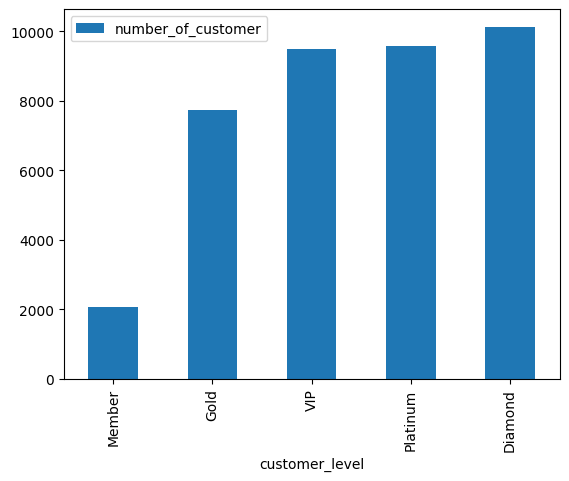

In [ ]:
observations.sort_values(by=["number_of_customer"]).plot.bar(x="customer_level", y="number_of_customer")

Best sellers of March : TOP 10
1. Highest order total money
2. Highest number of deals

In [ ]:
import pandas as pd
# 1> Highest order total money

query = """
SELECT staff_name, staff_id, SUM(order_total_money) AS total_sales_money
FROM staff_dim A 
JOIN order_fact B ON A.staff_key=B.staff_key
WHERE date(B.order_date_time) BETWEEN '2018-03-01' AND '2018-03-31'
GROUP BY staff_id
ORDER BY total_sales_money DESC
LIMIT 10;
"""
observations = pd.read_sql(query, con)
observations

,staff_name,staff_id,total_sales_money
0,Paul Crowley,41347,1971.6
1,Denia Caballero,43678,1648.2
2,Marius Sabaliauskas,39982,1590.7
3,Maura Hopkins,44102,1533.9
4,Simon Eldershaw,43975,1490.5
5,Wolfgang Larrazábal,43822,1430.3
6,Dejan Drakul,43004,1422.2
7,Nele Jansegers,44445,1356.7
8,John Dooley,39797,1355.2
9,John Harris,43468,1253.7


In [ ]:
import pandas as pd
# 1> Highest number of deals

query = """
SELECT staff_name, staff_id, COUNT(*) AS number_of_deals
FROM staff_dim A 
JOIN order_fact B ON A.staff_key=B.staff_key
WHERE date(B.order_date_time) BETWEEN '2018-03-01' AND '2018-03-31'
GROUP BY staff_id
ORDER BY number_of_deals DESC
LIMIT 10;
"""
observations = pd.read_sql(query, con)
observations

,staff_name,staff_id,number_of_deals
0,Harriett Baldwin,45447,4
1,Paul Crowley,41347,4
2,Ron Kee,47654,3
3,Yoad Nevo,47413,3
4,Uwe Windhorst,46855,3
5,Colin Cunningham,46385,3
6,Hamad Al-Sagoor,46238,3
7,Byron Hayward,45839,3
8,Čaba Silađi,45303,3
9,Anth Smith,45270,3


Stores with lowest monthly inventory during 2018, provided the date

In [ ]:
import pandas as pd
# Stores with highest inventory

query = """
SELECT store_name, store_address, MAX(store_inventory_quantity) AS lowest_monthly_inventory, date(date_time) AS date
FROM store_dim A
JOIN store_fact B ON A.store_key=B.store_key
WHERE date BETWEEN '2018-01-01' AND '2018-12-31'
GROUP BY store_name
ORDER BY lowest_monthly_inventory ASC
LIMIT 10;
"""
observations = pd.read_sql(query, con)
observations

,store_name,store_address,lowest_monthly_inventory,date
0,TOMPKINSVILLE,"TOMPKINSVILLE, KY, USA",1400,2018-07-01
1,BOULDER CITY,"BOULDER CITY, NV, USA",1500,2018-01-01
2,CREVE COEUR,"CREVE COEUR, MO, USA",1600,2018-05-01
3,EAU CLAIRE,"EAU CLAIRE, WI, USA",1600,2018-05-01
4,GREENCASTLE,"GREENCASTLE, IN, USA",1600,2018-01-01
5,HILLSBORO,"HILLSBORO, OH, USA",1600,2018-04-01
6,LYNN,"LYNN, MA, USA",1600,2018-02-01
7,MAHNOMEN,"MAHNOMEN, MN, USA",1600,2018-02-01
8,SUN CITY WEST,"SUN CITY WEST, AZ, USA",1600,2018-05-01
9,ALPINE,"ALPINE, TX, USA",1700,2018-03-01


Total sales and profit per month

In [ ]:
import pandas as pd
# 1> Stores with highest inventory

query = """
SELECT strftime('%m', order_date_time) as Month, SUM(order_total_money) AS order_total_money, SUM(order_profit) AS order_profit
FROM order_fact
GROUP BY Month;
"""
observations = pd.read_sql(query, con)
observations

,Month,order_total_money,order_profit
0,01,680473.1,174573.6
1,02,595931.8,153288.2
2,03,759327.3,200936.8
3,04,1075123.0,277832.2
4,05,1466617.5,379386.3
5,06,1138506.8,298300.1
6,07,1429113.3,374391.6
7,08,1180375.0,306904.0
8,09,1298955.8,341558.1
9,10,1336695.8,342368.5


<Axes: xlabel='Month'>

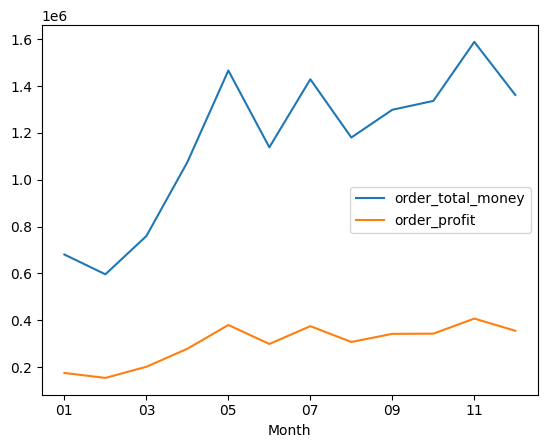

In [ ]:
observations.plot(x="Month", y=['order_total_money', 'order_profit'])